<a href="https://colab.research.google.com/github/rekuantsun/PTDL-Python/blob/main/Pandas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Câu 1:** Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh (sử dụng Google Colab)

In [17]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sta

**Câu 2:** Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Học Lập Trình/Học kỳ 2/PTDL - Python /database.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


**Câu 3:** Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương sai - độ lệch chuẩn, các phép tính phân vị, cực đại - cực tiểu để tính các thông sô cơ bản của các cột dữ liệu định lượng này.

In [20]:
df1 = pd.DataFrame(df, columns = ['Incident Month','Incident Day','Engine Make','Height','Speed'])
df1.head(10)

,Incident Month,Incident Day,Engine Make,Height,Speed
0,1,1,34.0,NaN,NaN
1,1,1,34.0,0.0,NaN
2,1,2,NaN,NaN,NaN
3,1,3,22.0,200.0,138.0
4,1,3,NaN,100.0,200.0
5,1,4,34.0,0.0,NaN
6,1,5,NaN,NaN,NaN
7,1,5,NaN,NaN,NaN
8,1,6,NaN,NaN,NaN
9,1,7,31.0,NaN,NaN


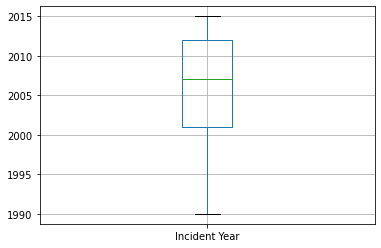

In [21]:
df.boxplot('Incident Year')

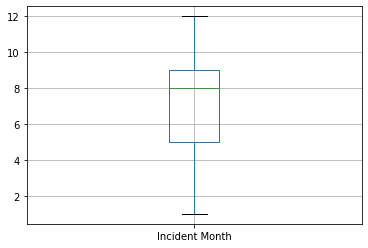

In [22]:
df.boxplot('Incident Month')

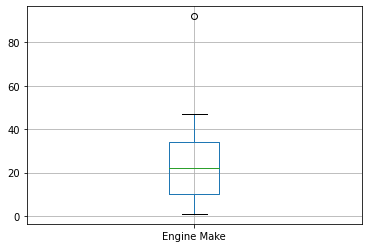

In [23]:
df.boxplot('Engine Make')

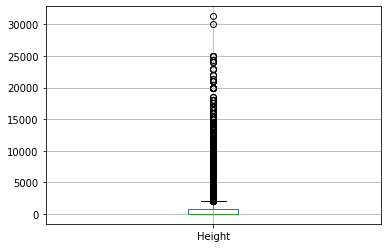

In [24]:
df.boxplot('Height')

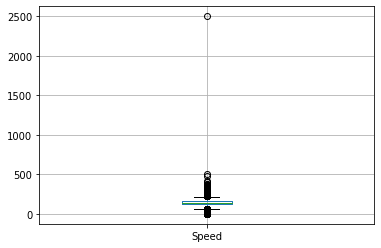

In [25]:
df.boxplot('Speed')

**Nhận xét:**

Các cột định lượng chứa giá trị ngoại lệ, bao gồm:

- Engine Make

- Height

- Speed

In [29]:
#Giá trị giới hạn
print("Highest allowed",df['Engine Make'].mean() + 3*df['Engine Make'].std())
print("Lowest allowed",df['Engine Make'].mean() - 3*df['Engine Make'].std())

Highest allowed 54.3764418583599
Lowest allowed -11.762526729627137


In [31]:
#Loại bỏ ngoại biên
new_df = df[(df['Engine Make'] < 8.80) & (df['Engine Make'] > 5.11)]
new_df

upper_limit = df['Engine Make'].mean() + 3*df['Engine Make'].std()
lower_limit = df['Engine Make'].mean() - 3*df['Engine Make'].std()

In [32]:
df['Engine Make'] = np.where(
    df['Engine Make']>upper_limit,
    upper_limit,
    np.where(
        df['Engine Make']<lower_limit,
        lower_limit,
        df['Engine Make']
    )
)

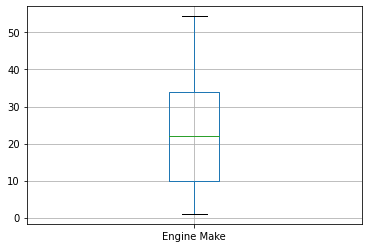

In [35]:
df.boxplot(column='Engine Make')